# IE360 Homework 2 - Burak Nur Erdem

## Automobile Imports of Turkey

### Table of Contents

1. Introduction<br><br> 
2. Manipulation of the Data<br><br>     
3. Plots of Each Factor on Timescale<br><br>      
4. Plots of Automobile Import and the Factors

    4.1. Exchange Rate (USD/TRY)<br><br>
    4.2. Interest On Vehicle Loans<br><br>
    4.3. Unemployment Rate<br><br>
    4.4. Total Income From Travels<br><br>
    4.5. Total House Sales Quantity
    <br><br>
5. Conclusion        



## 1. Introduction
<br>
In this homework, I analyze the relations between the imports of automobiles in Turkey to some economic factors. These factors are:<br>

* Usd/Try exchange rate  
* Interest on vehicle loans  
* Unemployment rate  
* Total income from travels  
* Total house sales quantity  

The reason I have chosen these factors is that I had some expectations on the relations with the factors beforehand which are stated individually in 4th section respectively. To clarify these intuitions, we need to plot and analyze the data. The imports of automobiles data start in year 2013, so the inspection period starts from 2013. Also note that there are some missing values for some of the columns in some months, but they are not frequent.

## 2. Manipulation of the Data
<br>
All of the data are from the data website of the Turkish Republic Central Bank. They are downloaded in an excel file which is included in the github website.
<br><br>
Down below, I have the R code which reads the data from this excel file and manipulates it in a way that is more useful for plotting.

In [1]:
suppressWarnings(library("readxl", quietly = TRUE))
suppressMessages(suppressWarnings(library("lubridate", quietly = TRUE)))
suppressWarnings(library("ggplot2", quietly = TRUE))

table = read_excel("EVDS.xlsx")
table = as.data.frame(table)

# Naming column names
colnames(table) = c("Date", "House Sale Qty", "Total Travel Incomes (mil USD)",
                    "Automobile Import (thousand USD)", "USD/TRY rate",
                    "Vehicle Loan Interest (%TRY)", "Unemployment Rate (%)")

# Removing the unnecessary info rows.
table = table[1:96,]

# Correcting the date column to date object
table[,1] = ym(table[,1]) 

# These two columns are char, need to be numberic
table[,2] = as.numeric(table[,2])
table[,3] = as.numeric(table[,3])


head(table)
tail(table)
str(table)


Date,House Sale Qty,Total Travel Incomes (mil USD),Automobile Import (thousand USD),USD/TRY rate,Vehicle Loan Interest (%TRY),Unemployment Rate (%)
2013-01-01,87444,1215,335849.5,1.763859,11.0575,9.7
2013-02-01,88519,1161,620548.8,1.769925,10.9125,9.7
2013-03-01,97956,1527,919749.7,1.807195,10.4800,9.4
2013-04-01,95381,1703,865369.5,1.796471,10.2950,8.7
2013-05-01,103261,2631,880420.3,1.822777,9.8820,8.2
2013-06-01,96424,2963,846300.2,1.894510,9.6075,8.1


,Date,House Sale Qty,Total Travel Incomes (mil USD),Automobile Import (thousand USD),USD/TRY rate,Vehicle Loan Interest (%TRY),Unemployment Rate (%)
91,2020-07-01,229357,468,824292.3,6.851095,11.6140,13.4
92,2020-08-01,170408,1366,569335.2,7.252190,14.3850,13.2
93,2020-09-01,136744,1581,854567.0,7.507782,16.8525,NA
94,2020-10-01,119574,NA,1056742.3,7.873881,17.4520,NA
95,2020-11-01,NA,NA,NA,8.003324,18.8125,NA
96,2020-12-01,NA,NA,NA,7.817083,NA,NA


'data.frame':	96 obs. of  7 variables:
 $ Date                            : Date, format: "2013-01-01" "2013-02-01" ...
 $ House Sale Qty                  : num  87444 88519 97956 95381 103261 ...
 $ Total Travel Incomes (mil USD)  : num  1215 1161 1527 1703 2631 ...
 $ Automobile Import (thousand USD): num  335849 620549 919750 865369 880420 ...
 $ USD/TRY rate                    : num  1.76 1.77 1.81 1.8 1.82 ...
 $ Vehicle Loan Interest (%TRY)    : num  11.06 10.91 10.48 10.29 9.88 ...
 $ Unemployment Rate (%)           : num  9.7 9.7 9.4 8.7 8.2 8.1 8.6 9 9.2 9.1 ...


## 3. Plots of Each Factor on Timescale

These plots may not be very helpful when understanding the relations. However, they can give some insights of the behaviors of the factors over time which can help when analyzing the plots in the 4th section.

As we can see in plots below, there is some seasonality on the imports of cars, but in some factors such as exchange rate, there is not a seasonal relationship on a great extent. This is probably one of the reasons why the points are somewhat scattered on the 4th section.

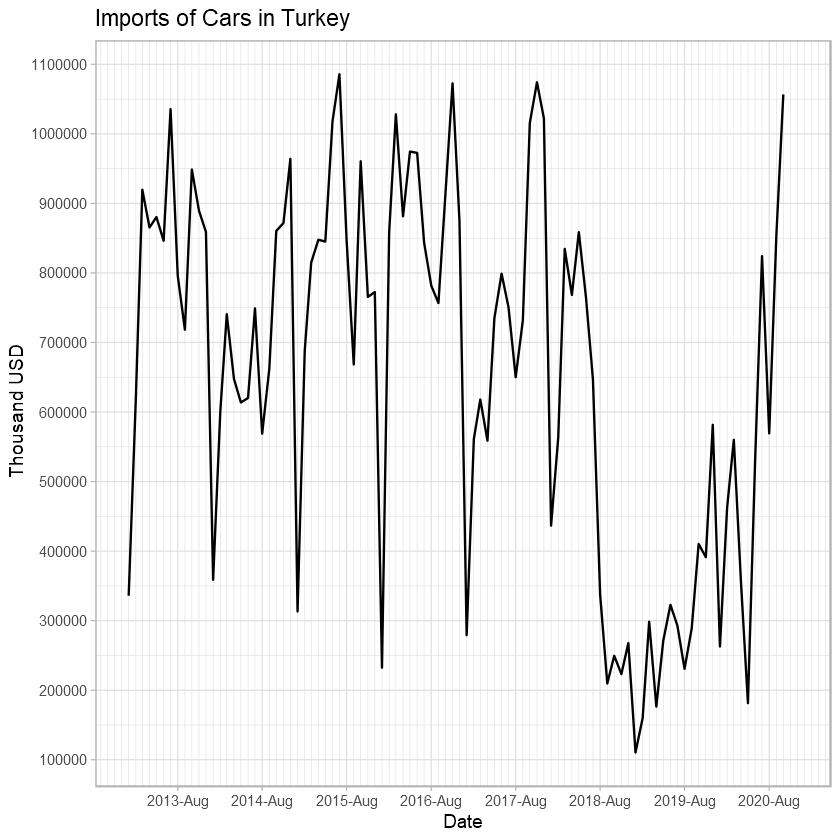

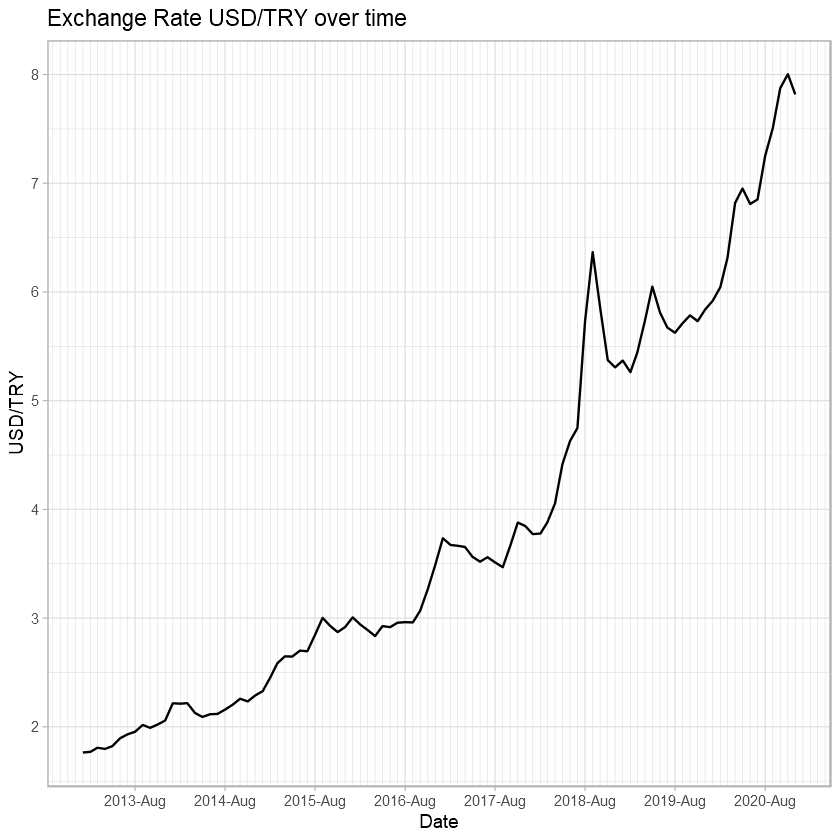

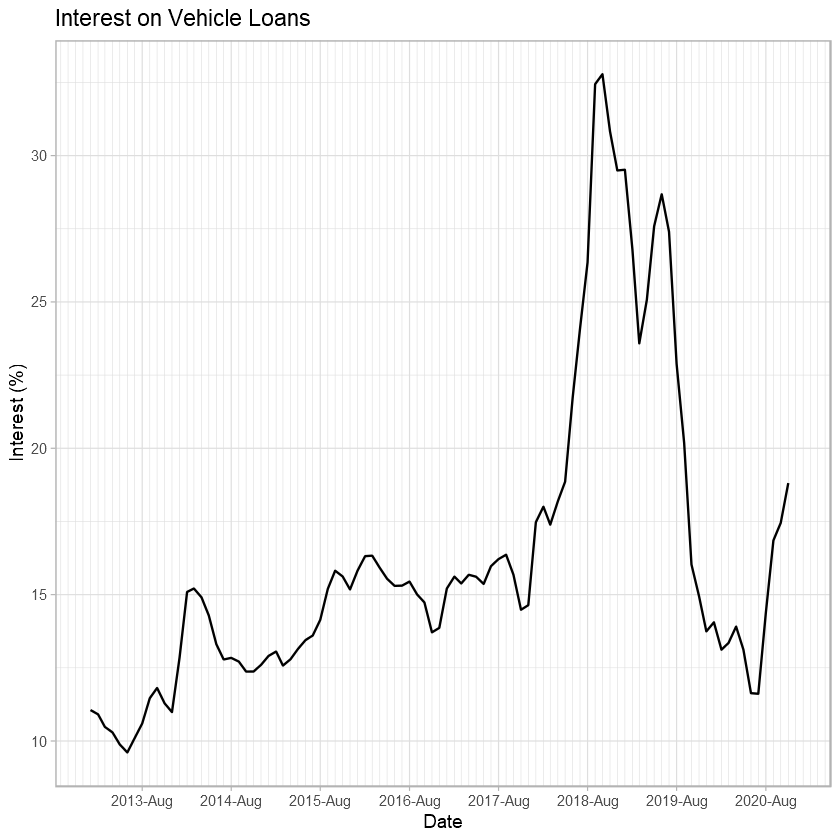

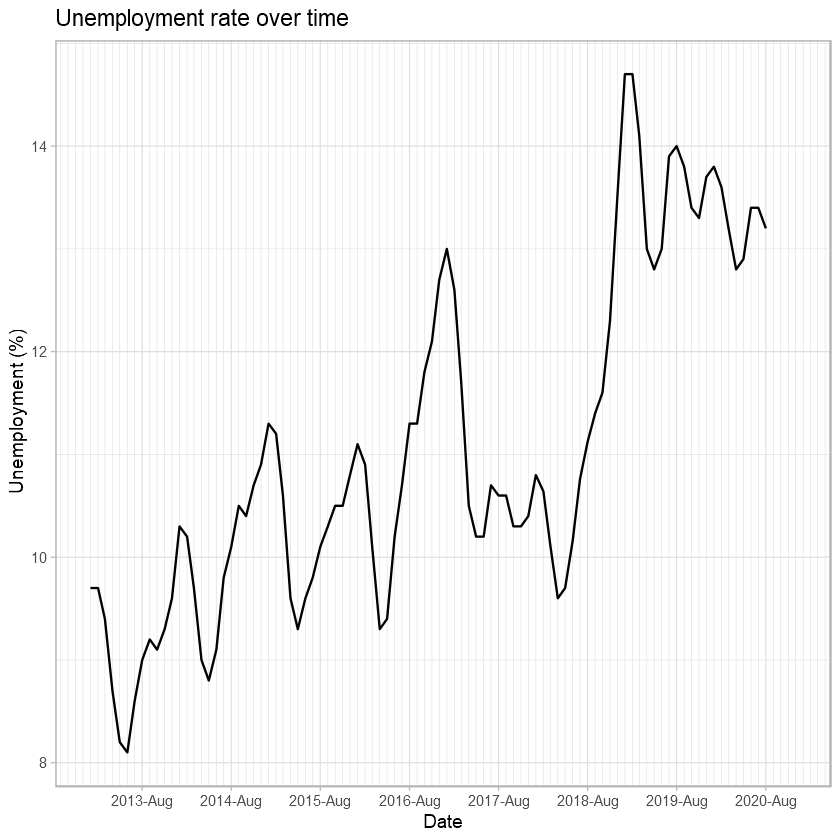

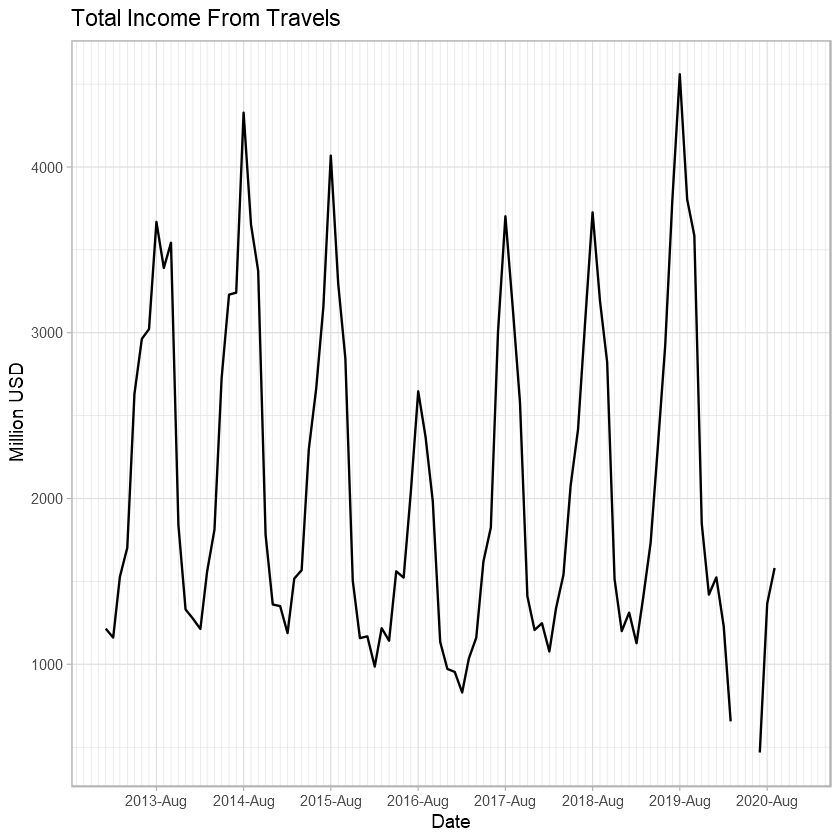

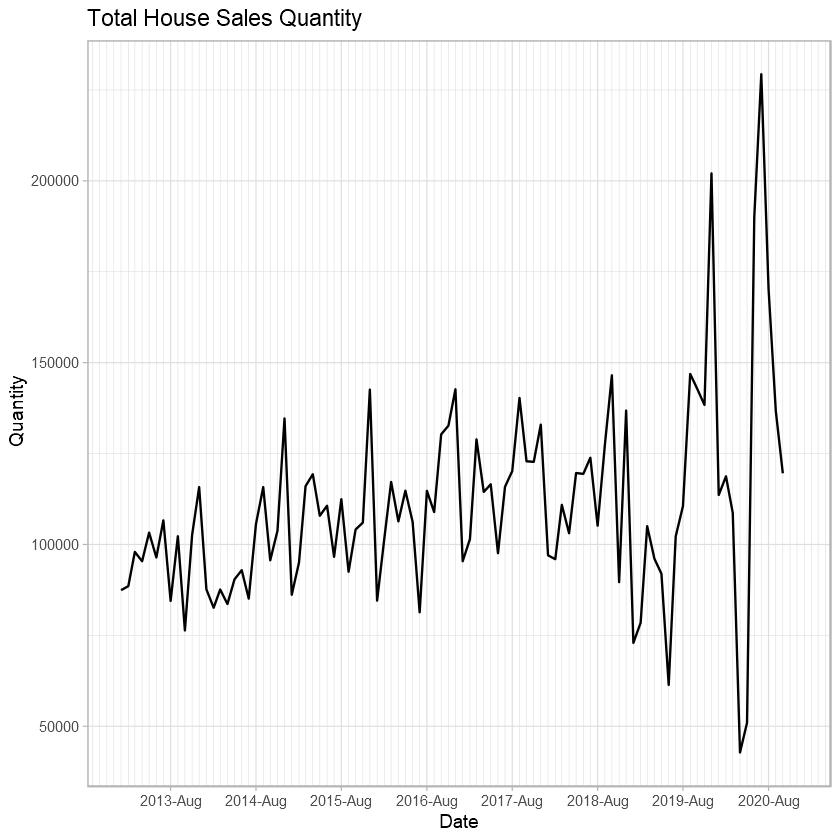

In [2]:
# Imports of cars over time
ggplot(table, aes(x = table[,1], y = table[,4])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") + 
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    xlab("Date") + 
    ylab("Thousand USD") + 
    ggtitle("Imports of Cars in Turkey") +
    geom_line(na.rm = TRUE) +
    theme_light()

# Exchange rate over time
ggplot(table, aes(x = table[,1], y = table[,5])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") + 
    scale_y_continuous(breaks = seq(1,10,1)) +
    xlab("Date") + 
    ylab("USD/TRY") + 
    ggtitle("Exchange Rate USD/TRY over time") +
    geom_line(na.rm = TRUE) +
    theme_light()

# Interest on vehicle loans over time
ggplot(table, aes(x = table[,1], y = table[,6])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") +     
    xlab("Date") + 
    ylab("Interest (%)") + 
    ggtitle("Interest on Vehicle Loans") +
    geom_line(na.rm = TRUE) +
    theme_light()

# Unemployment rate over time
ggplot(table, aes(x = table[,1], y = table[,7])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") +
    xlab("Date") + 
    ylab("Unemployment (%)") + 
    ggtitle("Unemployment rate over time") +
    geom_line(na.rm = TRUE) +
    theme_light()

# Total income from travels over time
ggplot(table, aes(x = table[,1], y = table[,3])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") +     
    xlab("Date") + 
    ylab("Million USD") + 
    ggtitle("Total Income From Travels") +
    geom_line(na.rm = TRUE) +
    theme_light()

# Total house sales in quantity
ggplot(table, aes(x = table[,1], y = table[,2])) +
    scale_x_date(date_breaks = "12 month", minor_breaks = "1 month", date_labels = "%Y-%b") + 
    xlab("Date") + 
    ylab("Quantity") + 
    ggtitle("Total House Sales Quantity") +
    geom_line(na.rm = TRUE) +
    theme_light()

## 4. Plots of Automobile Import and the Factors

In order to see any relation between imports and a factor, I plotted them. In this homework, we don't go into any calculations, so assumptions are made visually using these graphs.

### 4.1. Exchange Rate (USD/TRY) and Imports of Automobiles

I expect to see a negative relationship between these factors. It seems reasonable to me that as the exchange rate increases, we should see a fall on the import amount.

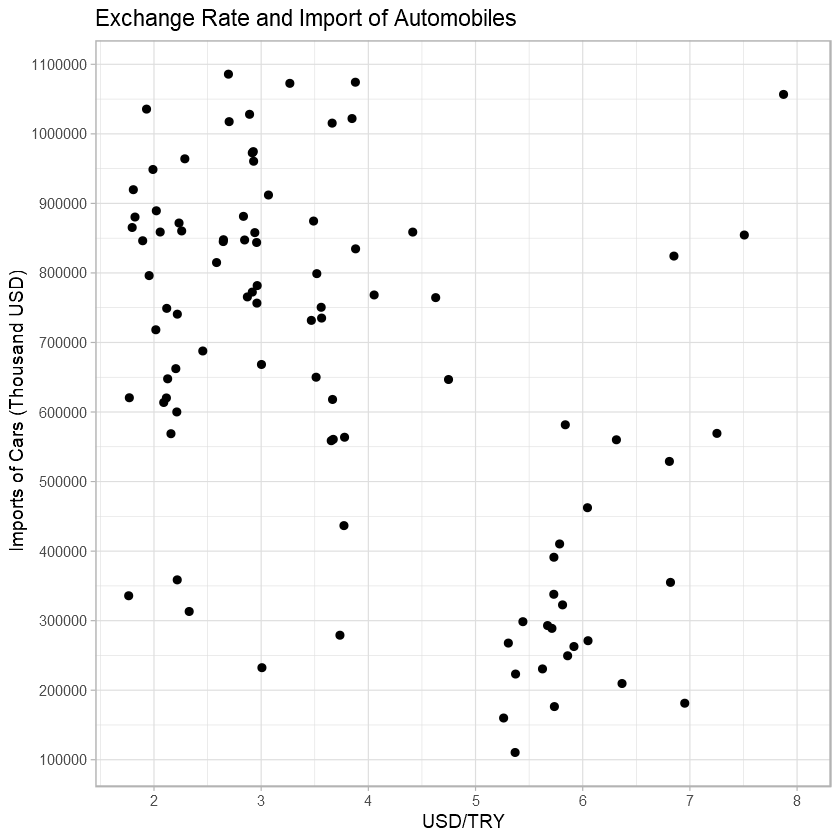

In [3]:
ggplot(table, aes(x = table[,5], y = table[,4])) +
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    ylab("Imports of Cars (Thousand USD)") +
    scale_x_continuous(breaks = seq(1,10,1)) +
    xlab("USD/TRY") + 
    ggtitle("Exchange Rate and Import of Automobiles") +
    geom_point(na.rm = TRUE) +
    theme_light()

I think we can see the somewhat negative relationship on this plot. The points are clustered on the left-top corner and right bottom corner, even though there are exceptions. This seems to support my initial guess that the exchange rate and imports of automobiles are inversely related.

### 4.2. Interest on Vehicle Loans and Imports of Automobiles

Like in the exchange rate case, I expect to see a negative relation between the interest on vehicle loans and imports of automobiles. People would restrain from bank loans when the interest rates are high and would not buy cars. This may reduce the import amount on automobiles.
<br><br>
There is a two graphs in this section. The interest is on TRY, so I think it would be better to see two different graphs in which the first includes the imports as in thousand USD and the second as in thousand TRY. The latter is achieved by dividing the import data with the exchange rate and includes the information of exchange rate from the plot in 4.1st section and the first graph of this section.

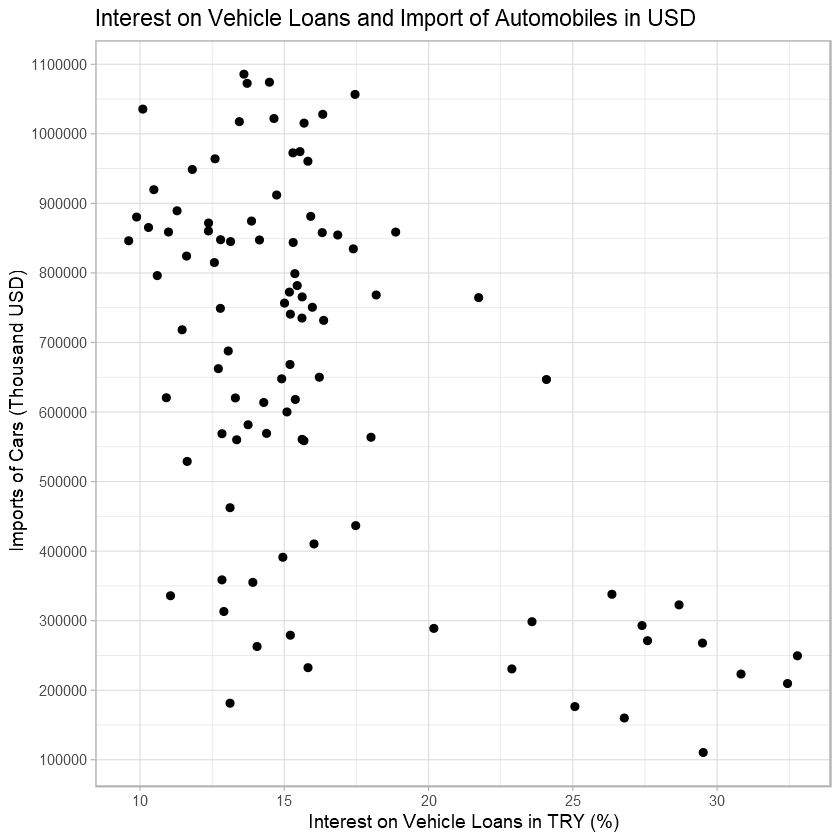

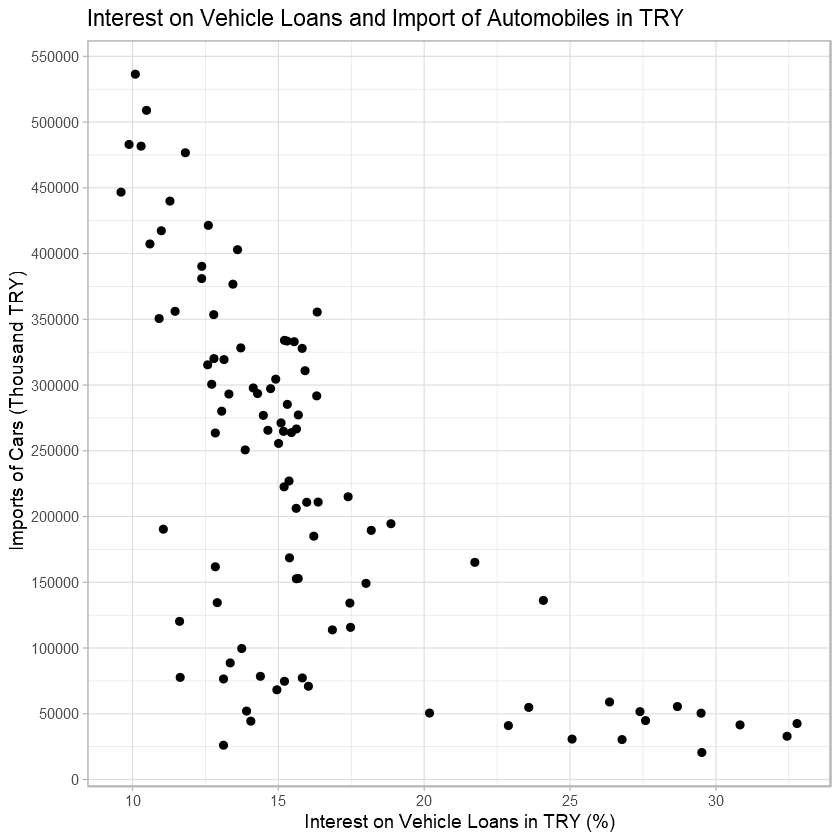

In [4]:
ggplot(table, aes(x = table[,6], y = table[,4])) +
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    ylab("Imports of Cars (Thousand USD)") +     
    xlab("Interest on Vehicle Loans in TRY (%)") + 
    ggtitle("Interest on Vehicle Loans and Import of Automobiles in USD") +
    geom_point(na.rm = TRUE) +
    theme_light()

ggplot(table, aes(x = table[,6], y = table[,4]/table[,5])) +
    scale_y_continuous(breaks = seq(0,600000,50000)) +
    ylab("Imports of Cars (Thousand TRY)") +     
    xlab("Interest on Vehicle Loans in TRY (%)") + 
    ggtitle("Interest on Vehicle Loans and Import of Automobiles in TRY") +
    geom_point(na.rm = TRUE) +
    theme_light()

In the plots, we can see points accumulated in a left sided triangles with emphases on top-left corners meaning that the imports tend to increase when interest on loan are low. Also there are not any points in the right-upper corners. These support my initial idea of the interest on vehicle loans and imports of automobiles being negatively related.
<br><br>
The two plots are similar and give the same results at least in the visual level. However the second graph is superior in my opinion, because it combines the exchange rate and imports in USD and gives a more clear relation.

### 4.3. Unemployment Rate and Imports of Automobiles

I believe that the unemployment rate and the amount of automobile imports should be negatively related. Since an increase in the umemployment rate is an indication of a bad economy, we can except to see low imports of cars in those periods where the unemployment is high.

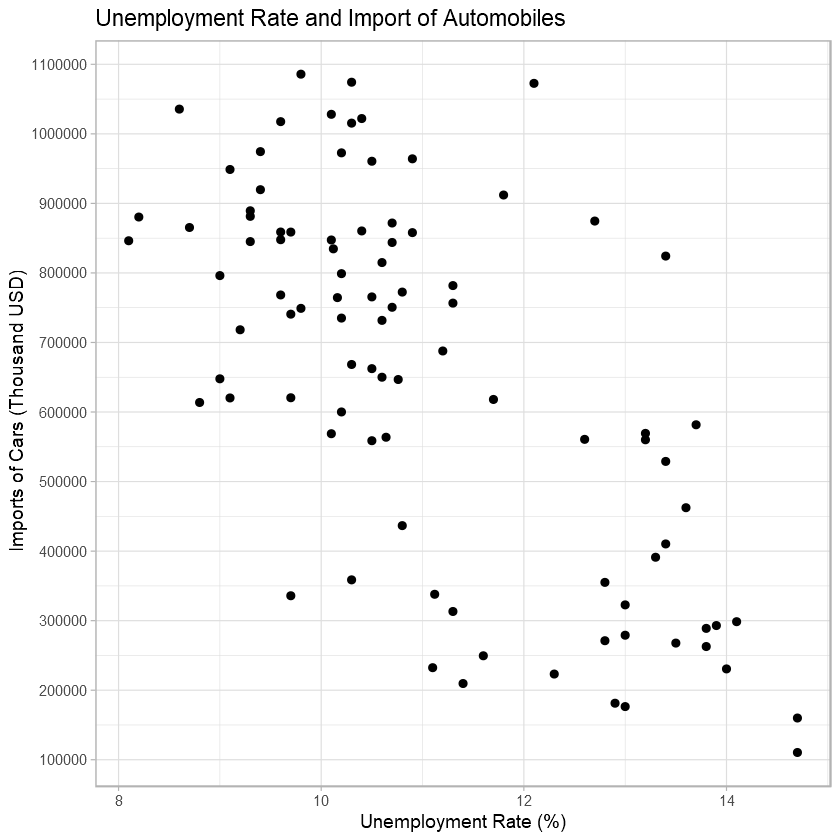

In [5]:
ggplot(table, aes(x = table[,7], y = table[,4])) +
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    ylab("Imports of Cars (Thousand USD)") +     
    xlab("Unemployment Rate (%)") + 
    ggtitle("Unemployment Rate and Import of Automobiles") +
    geom_point(na.rm = TRUE) +
    theme_light()

Again, I think the points are accumulated in top-left and bottom-right corner which is an indication of a negative relation.

### 4.4. Total Income From Travels and Imports of Automobiles

The relation with income from travels may come up weak compared to former factors, but as with the reasoning in the umemployment case, level of the travel incomes are an indicator of the situation in economy. I expect to see a rise in automobile imports when total income from travels are rising, so the expectation is a positive relation this time. 

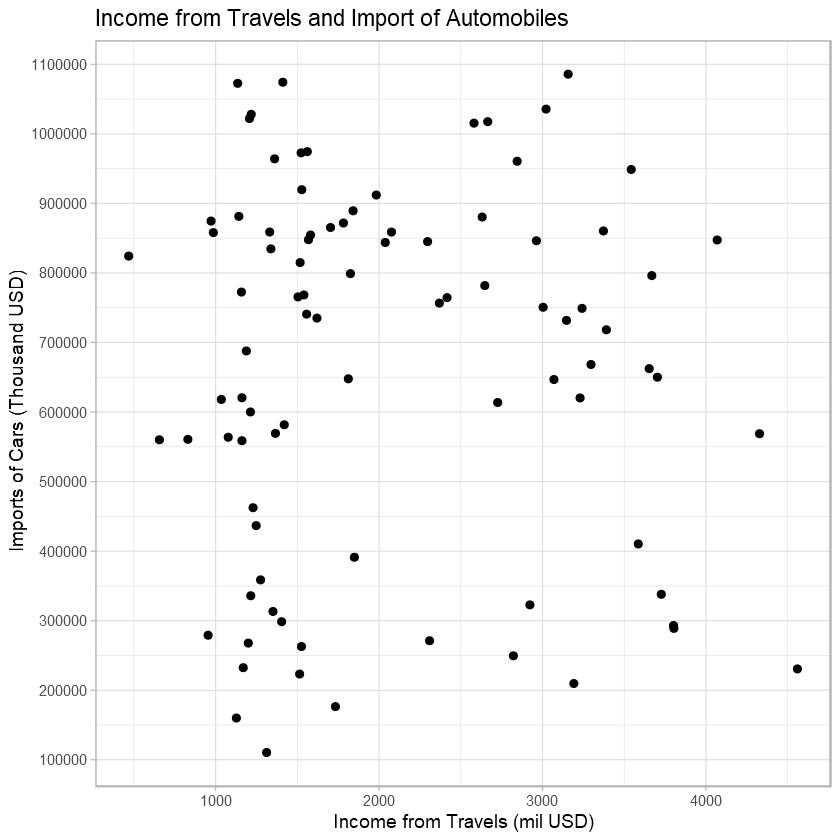

In [6]:
ggplot(table, aes(x = table[,3], y = table[,4])) +
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    ylab("Imports of Cars (Thousand USD)") +     
    xlab("Income from Travels (mil USD)") + 
    ggtitle("Income from Travels and Import of Automobiles") +
    geom_point(na.rm = TRUE) +
    theme_light()

The points on the graph look random and doesn't show a distinctive relation visually. My first instinct was that this may be caused by the seasonalities of the travel incomes which we saw in 3rd section and we may see the relation in the yearly data. So I calculated the yearly values and plotted them.

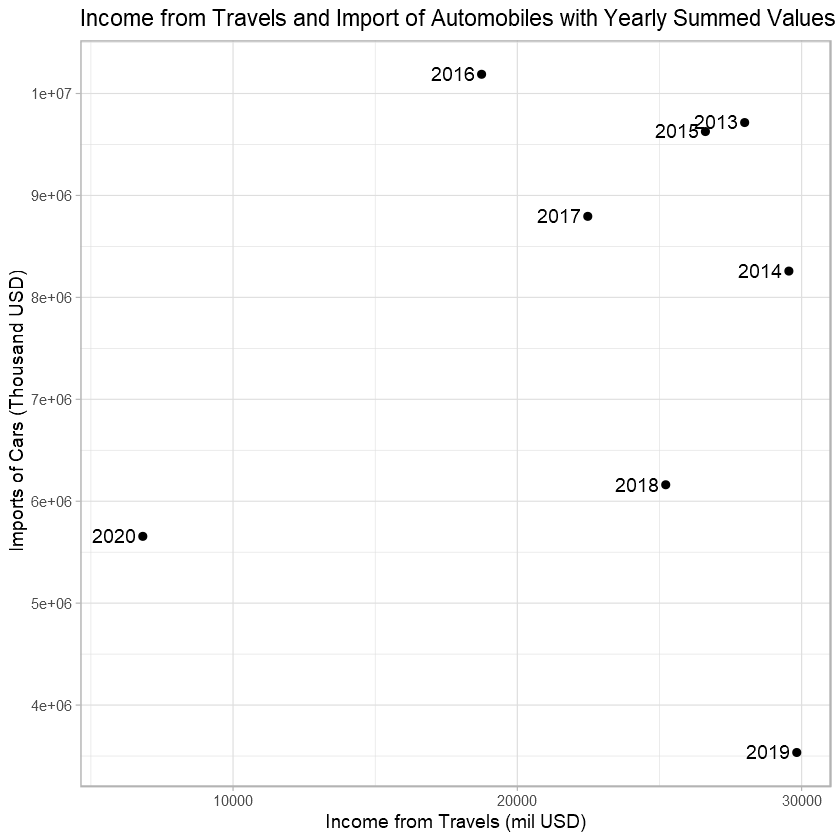

In [7]:
# Initialization of the vectors as empty
year = seq(as.Date("2013-01-01"), as.Date("2020-01-01"), by="years")
yearlyImport = rep(0, times = as.integer(length(table[,1]) /12) + length(table[,1]) %% 12)
yearlyIncomeFromTravels = rep(0, times = as.integer(length(table[,1]) /12) + length(table[,1]) %% 12)

suppressWarnings(suppressMessages(library(data.table)))

# Creating a dataframe to hold yearly values
yearlyTable = data.table(year, yearlyImport, yearlyIncomeFromTravels)

# Summing monthly values to corresponding years
for(i in 1:length(table[,1])){
    if(!is.na(table[i,4]))
        yearlyTable[year(year) == year(table[i,1]), 2] = yearlyTable[year(year) == year(table[i,1]),2] + table[i,4]
    if(!is.na(table[i,3]))
        yearlyTable[year(year) == year(table[i,1]), 3] = yearlyTable[year(year) == year(table[i,1]),3] + table[i,3]        
}

ggplot(yearlyTable, aes(x = unlist(yearlyTable[,3]), y = unlist(yearlyTable[,2]))) +
    scale_y_continuous(breaks = seq(1000000,11000000,1000000)) +
    ylab("Imports of Cars (Thousand USD)") +     
    xlab("Income from Travels (mil USD)") + 
    ggtitle("Income from Travels and Import of Automobiles with Yearly Summed Values") + 
    geom_point() +
    geom_text(aes(label = year(yearlyTable[,year])), nudge_x = -1000, nudge_y = 1000) +
    theme_light()

It is hard to point out a relation in this yearly graph as well. We could say that, the methods I used are failed to reveal a relationship between income from travels and the imported automobiles.

### 4.5. Total House Sales Quantity and Imports of Automobiles

This relation may also come out weak, but I expect to a positive relation, because I think that both imported cars and house sales should increase in times of good economy and should decrease in times of bad economy.

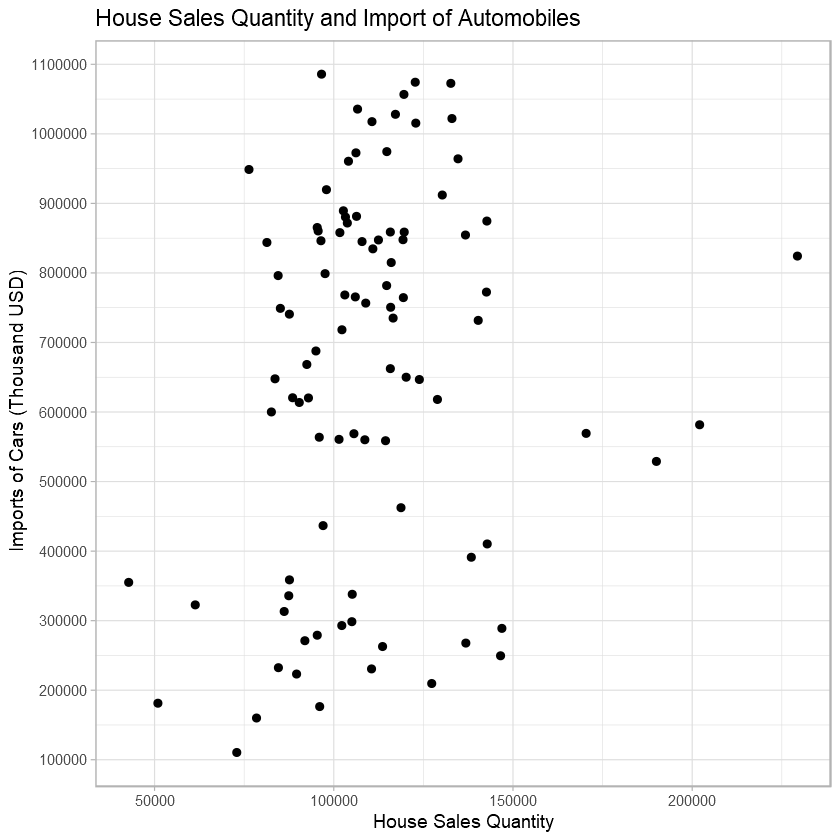

In [8]:
ggplot(table, aes(x = table[,2], y = table[,4])) +
    scale_y_continuous(breaks = seq(100000,1100000,100000)) +
    ylab("Imports of Cars (Thousand USD)") +     
    xlab("House Sales Quantity") + 
    ggtitle("House Sales Quantity and Import of Automobiles") +
    geom_point(na.rm = TRUE) +
    theme_light()

I think, we can see a slight positive relation between the factors. The points seem to climb up with a very high slope which may mean that house sales quantity increase slower whereas import of cars increase rapidly.

## 5. Conclusion

In this homework, I tried to visualize and analyze relations of imported automobiles in Tukey with some other economic/statistical factors. In 4 out of 5 factors, I was able to see relations in monthly level. In the one which I couldn't see a relation, I tried plotting yearly data, but, that failed as well. 
<br><br>
I should also mention that the relations doesn't mean causation and the relations I visualized in this homework are probably related to a ton of other factors and maybe related to each other indirectly or in a way that they are the consequences of similar economic factors.